# Classification du vin

L'objectif de ce premier exercice est de se familiariser avec un premier problème pouvant être résolu avec les méthodologies et techniques utilisées en machine learning.

## Visualisation des données

Les données utilisées pour ce premier exercice sont issues de l'UC Irvine Machine Learning Repository : https://archive.ics.uci.edu/ml/datasets/wine

Elles sont disponibles sur ce site, ou alors dans l'archive que vous avez téléchargée, dans le répertoire `snowcamp/wine/`

In [ ]:
ls snowcamp/datasets/wine/

In [ ]:
def read_first_lines(file_path, num_lines=10):
    """Read first lines of a given file
        
    # Arguments
        file_path : Full file path.
        num_lines: Number of lines to read.
        
    # Returns
        An array with first lines of the given file.
    """
    with open(file_path) as f:
        return [next(f) for x in range(num_lines)] if num_lines is not None else f.readlines()
    
def display_first_lines(file_path, num_lines=10):
    """Display first lines of a given file
        
    # Arguments
        file_path : Full file path.
        num_lines: Number of lines to read.
        
    # Returns
        An array with first lines of the given file.
    """
    for l in read_first_lines(file_path, num_lines):
        print(l)   
   
display_first_lines('snowcamp/datasets/wine/wine.data')


La documentation de ces données se trouve dans le fichier 

In [ ]:
display_first_lines('snowcamp/datasets/wine/wine.names', None)

### Import des données avec la librairie pandas

Pandas est une librairie python permettant de charger des données, de les visualiser, de les transformer et de les décrire. 

Elle dispose de plusieurs fonctions utilitaires, comme la fonction read_csv permettant de charger les données dans un objet de 'type' dataframe.

In [2]:
import pandas as pd

columns = [ 'producer', 'alcohol', 
                                               'malic_acid', 'ash', 
                                               'ash_alcalinity', 
                                               'magnesium', 
                                               'total_phenols',
                                               'flavanoids', 'non_flavanoids_phenols', 
                                               'proanthocyanins', 'color_intensity', 'hue', 'od', 'proline']

wine_dataframe = pd.read_csv('snowcamp/datasets/wine/wine.data', names= columns)

"""Affichez ici les 10 premières lignes avec la fonction head() du dataframe"""
wine_dataframe...

'Affichez ici les 10 premières lignes'

### Description des données

In [ ]:
"""Affichez ici la description des données"""
wine_dataframe...

In [3]:
"""Affichez ici les informations sur les données de la dataframe"""
wine_dataframe...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
producer                  178 non-null int64
alcohol                   178 non-null float64
malic_acid                178 non-null float64
ash                       178 non-null float64
ash_alcalinity            178 non-null float64
magnesium                 178 non-null int64
total_phenols             178 non-null float64
flavanoids                178 non-null float64
non_flavanoids_phenols    178 non-null float64
proanthocyanins           178 non-null float64
color_intensity           178 non-null float64
hue                       178 non-null float64
od                        178 non-null float64
proline                   178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [17]:
"""Utilisez la fonction groupby() et affichez la moyenne des features des vins de chaque producteurs"""
wine_per_producer_df = wine_dataframe...
wine_per_producer_df...

,alcohol,malic_acid,ash,ash_alcalinity,magnesium,total_phenols,flavanoids,non_flavanoids_phenols,proanthocyanins,color_intensity,hue,od,proline
producer,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


### Visualisation des données (matplotlib)

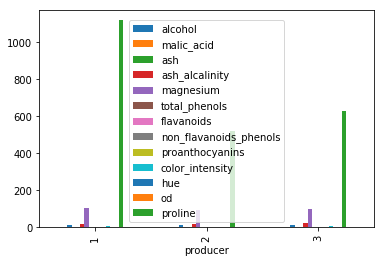

In [21]:
%matplotlib inline     

"""Affichez toutes les moyennes (fonction mean() du dataframe) par producteur sous forme de diagrammes à barres."""
wine_per_producer_df...

"""Affichez le taux d'alcool moyen du vin par producteur sous forme de diagrammes à barres."""
wine_per_producer_df...

### Visualisation des données (matplotlib + seaborn)

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

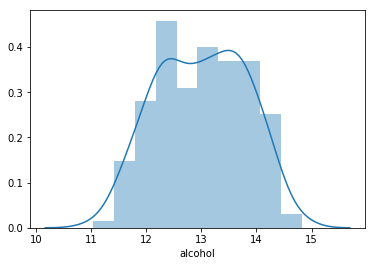

In [40]:
"""Avec la fonction distplot de seaborn, affichez un histogramme sur 10 intervalles 
de la distribution du taux d'alcool"""

sns.distplot(...)
plt.show()

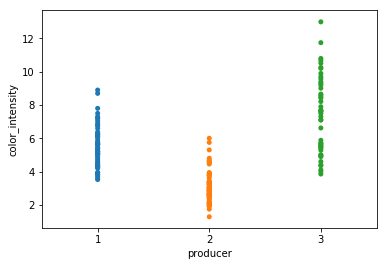

In [48]:
"""Trouvez la meilleur façon d'afficher l'alcool de chaque vin en fonction du producteur. (swarmplot, distplot...)"""
sns...

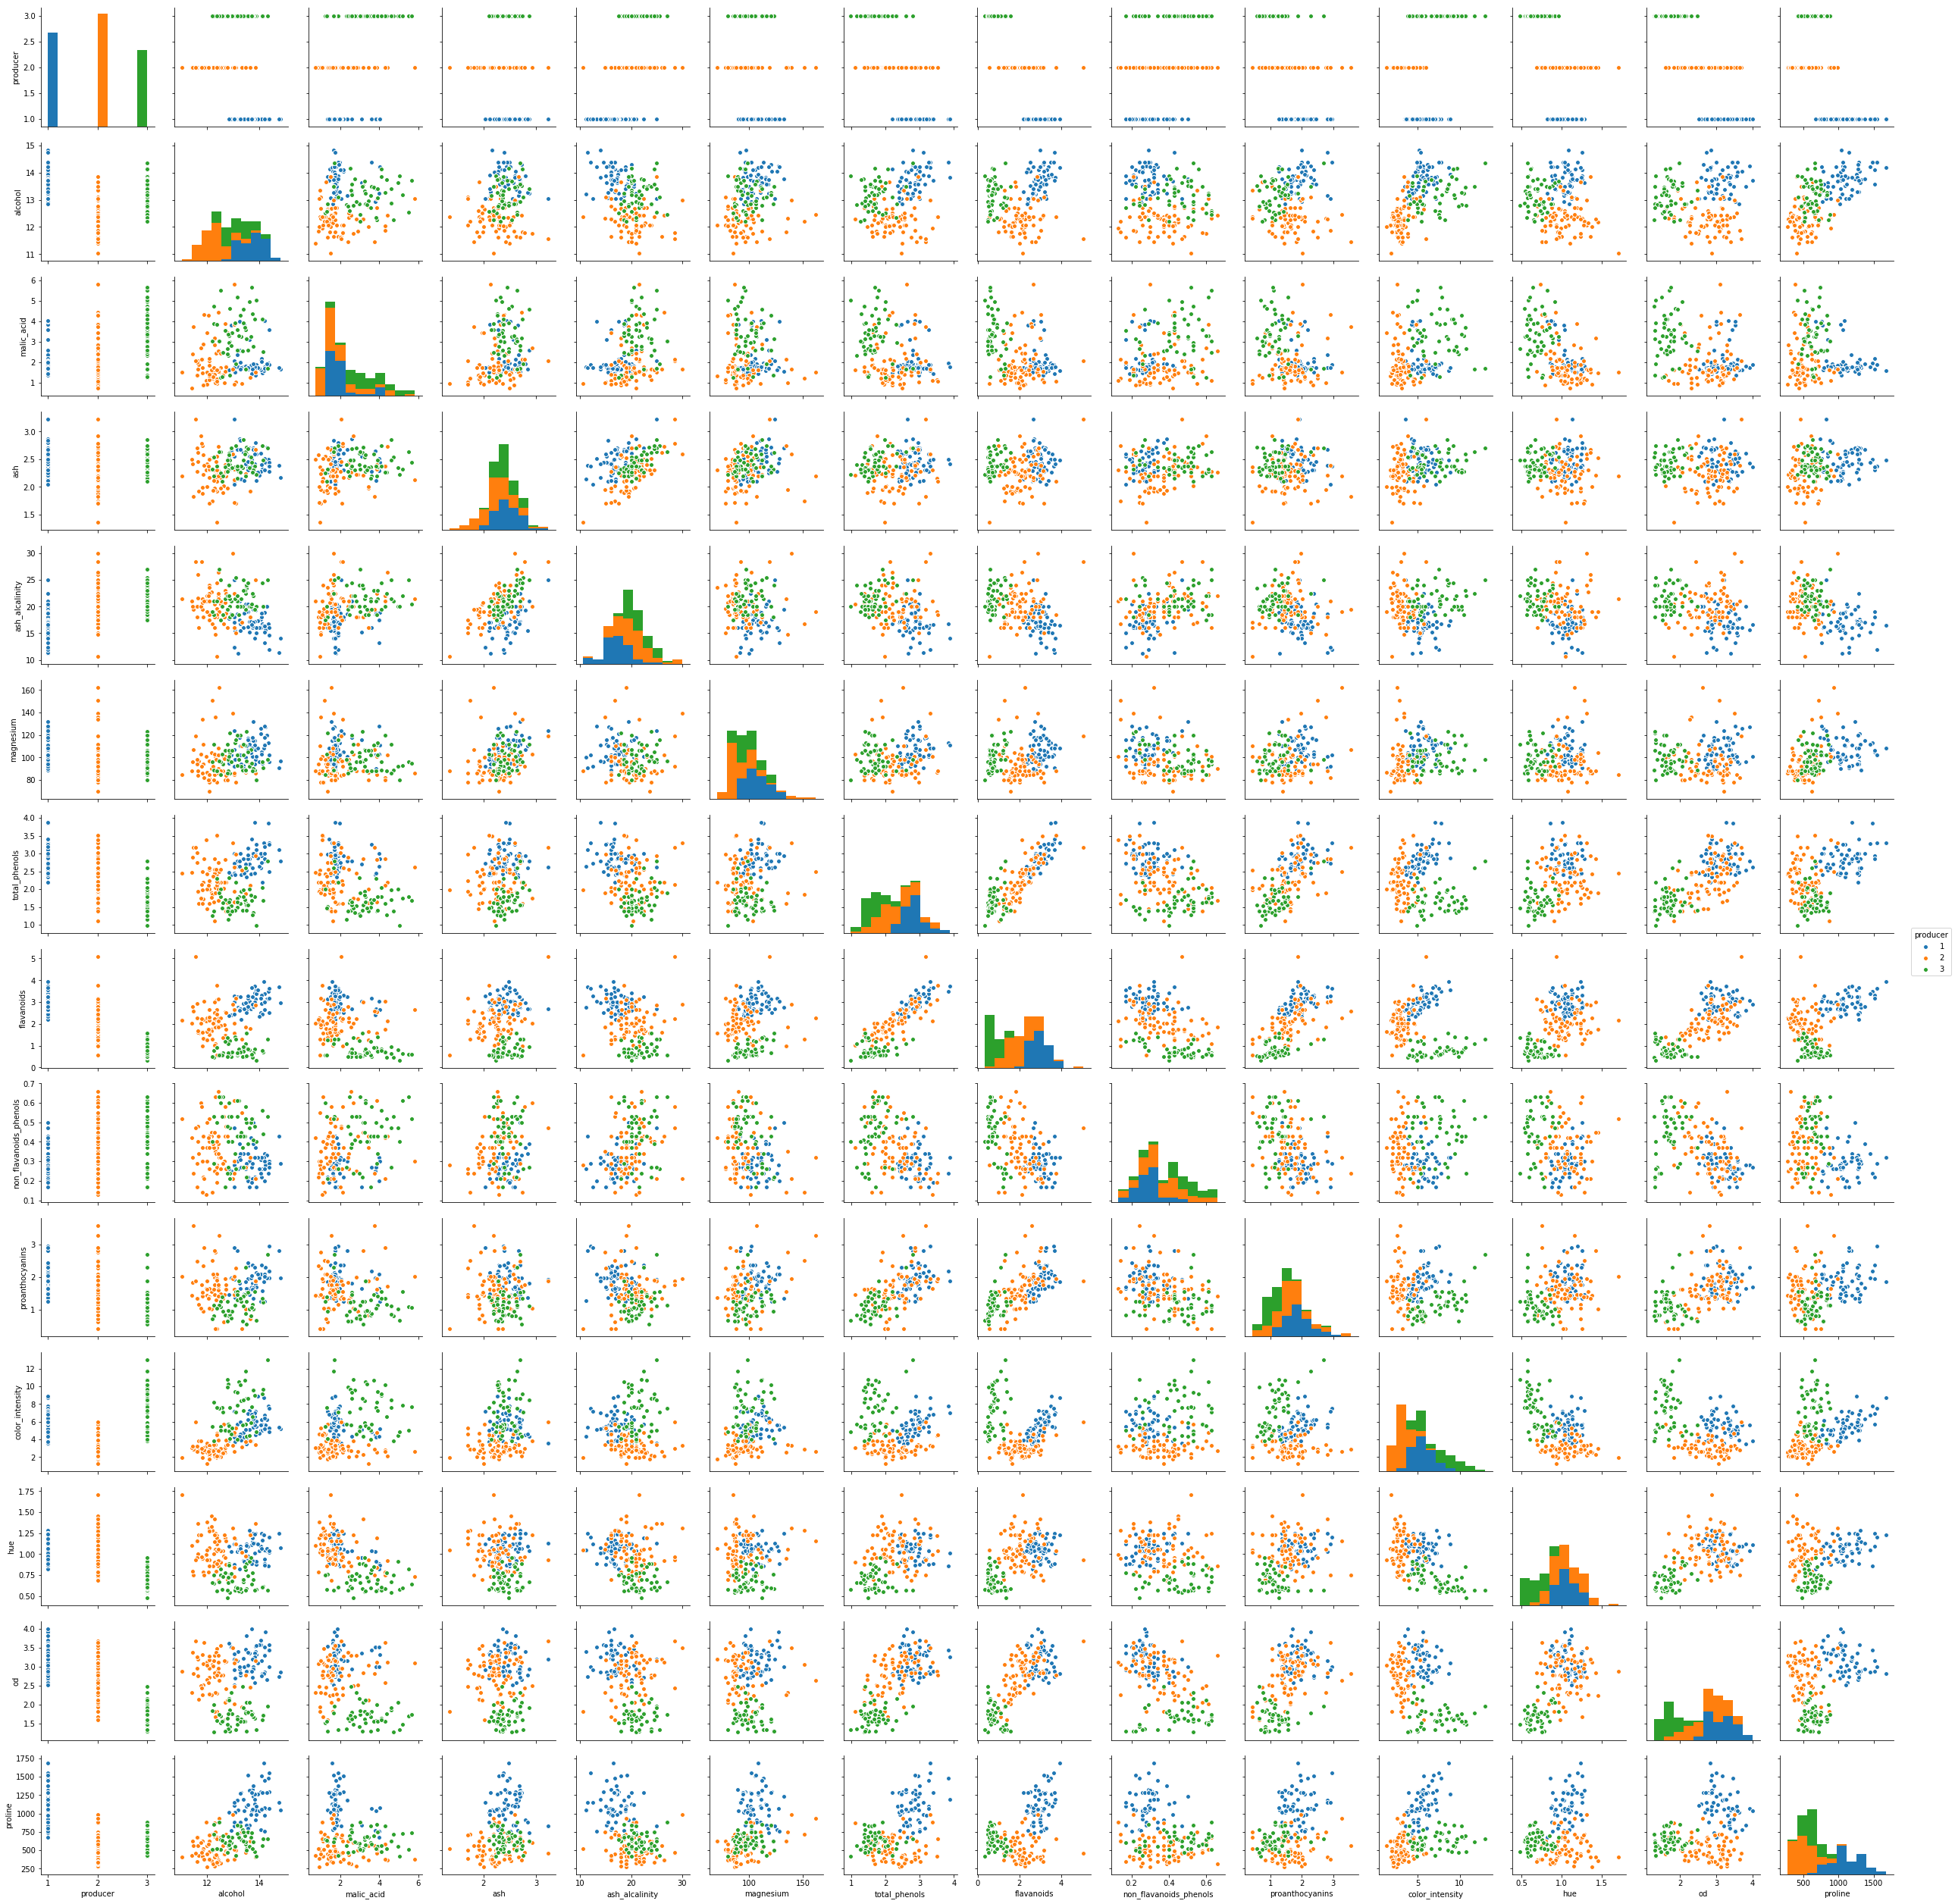

In [52]:
"""Utilisez la fonction pairplot de seaborn afin de déterminer si des corrélations 
entre les features"""
sns.pairplot(...);

"""Utilisez l'option hue afin de constater quel couples de variables discriminent 
le mieux les producteurs"""

## Machine Learning !

Notre objectif est de créer un modèle qui aura appris, en fonction des données existantes, à catégoriser les vins selon leur producteur. Plusieurs algorithmes de machine learning existent pour résoudre les problèmes de classification. Nous allons utiliser pour cet exercice un réseau de neurones, avec la librairie Keras.

### Préparation des données

Avant d'implémenter notre premier réseau de neurones, nous devons préparer les données. Notamment, séparer notre dataframe en 2 nouvelles dataframes:
* Une dataframe avec les attributs (features) : dataframe qui contiendra uniquement les caractéristiques des vins.
* Une dataframe qui contiendra la cible (target) : une dataframe qui contiendra uniquement les producteurs


In [ ]:
"""Construisez vos données d'entraînement en enlevant la colonne producer du dataset 
pour l'input (X) et utilisez cette colonne en tant qu'output (y)"""
X = wine_dataframe...
y = wine_dataframe[...]

In [ ]:
X.head()

In [ ]:
y.head()

### One hot encoding

La valeur donnée pour chaque producteur n'est pas à proprement parler une valeur qui le caractérise (une valeur continue et ordonnée) mais plutôt un code donné arbitrairement.

Il est donc nécessaire de transformer ces données, les encoder en catégories.

Nous disposons de 3 catégories (3 producteurs). Le premier  producteur pourrait être encodé de cette manière:

> Producteur 1 = [1, 0, 0]

Le second : 

> Producteur 2 = [0, 1, 0]

Et le troisième : 

> Producteur 3 = [0, 0, 1]

In [ ]:
"""Utilisez la fonction get_dummies() de pandas afin d'encoder l'output (y)"""
y_cat = pd...

In [ ]:
"""Import des librairies Keras utilisées pour construire notre modèle"""
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

### Définition d'un modèle

Il existe 2 méthodes pour définir un modèle avec Keras:

* L'API de modélisation séquentielle : permet de définir une pile de couches (layers) de façon linéaire
* L'API fonctionnelle (Functional) : permet de définir des modèles plus complexes (graphes notamment)



Création d'un modèle séquentiel

In [ ]:
model = Sequential()

### Les différentes couches

Différentes couches peuvent être utilisées avec Keras.

Les couches "core" : 
* Dense : Une couche entièrement connectée (à la couche précédente). Couche de base d'un réseau de neurones.
* Activation : Applique une fonction d'activation (voir plus bas).
* Dropout : Supprime volontairement des données, de manière arbitraire. Pour éviter le surapprentissage (mauvaise généralisation du modèle).
* Flatten : Réduit le nombre de dimensions. Par ex. : (None, 64, 32, 32) => (None, 65536)

D'autres couches existent également : 
Masking, Permute, Reshape, etc. (https://keras.io/layers/core)


Ajout d'une couche cachée (hidden layer) de 16 neurones, avec un biais et des poids initialisés de manière uniforme. Cette couche sera connectée à nos attributs caractérisant le vin.

In [ ]:
"""Construisez les deux premiers layers du NN. Spécifiez le nombre de features en input, 
le nombre de neurones de la couche cachée ainsi qu'un kernel_initializer afin d'initialiser
les poids entre les deux couches."""

"""doc : https://keras.io/initializers/"""

model.add(Dense(..., input_dim =..., kernel_initializer=..., use_bias=True))

### Les fonctions d'activation

On applique une fonction d'activation. Plusieurs fonctions d'activations sont disponibles. Elles permettent par exemple d'introduire de la non-linéarité dans les modèles (comme 'relu') ou de transformer les valeurs des sorties des neurones (pour ramener les valeurs sur une autre échelle comme 'softmax')

Ici, on ajouter une couche d'activation 'relu' à notre modèle.

In [ ]:
"""Spécifiez la fonction d'activation de la couche cachée. Ajoutez la ici ou ajoutez la 
en option dans la cellule précédente."""
model.add(...)

On ajoute une couche 'Dropout' pour valeur 0.1 (supprimera 10% des données en entrée de la dernière couche)

In [ ]:
"""Ajoutez un dropout sur les poids avec un pourcentage qui vous paraît adapté"""
model.add(...)

On ajoute une couche de sortie, avec 3 neurones (1 par producteur) et une couche d'activation ('softmax')

In [ ]:
"""Construisez la couche d'output"""
model.add(Dense(..., kernel_initializer=..., activation=...))


### Compilation du modèle

On compile notre modèle, en utilisant une fonction de coût 'categorical_crossentropy' et l'optimizer 'adam'.
On utilisera la métrique 'accuracy' afind de visualiser la performance de notre modèle.


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Entrainement du modèle

Pour entrainer notre modèle, on divisera nos données en 2 parties: 80% des données vont servir à entrainer le modèle, les 20% restant serviront à l'évaluer.

In [ ]:
model.fit(X, y_cat, epochs=500, validation_split=.20)

### Quelques prédictions

In [ ]:
import numpy as np

In [ ]:
new_wine_1 = [[13.48,1.67,2.64,22.5,89,2.6,1.1,.52,2.29,11.75,.57,1.78,620]]
model.predict_classes(np.array(new_wine))

In [ ]:
new_wine_2 = [[12.08,1.13,2.51,24,78,2,1.58,.4,1.4,2.2,1.31,2.72,630]]
model.predict_classes(np.array(new_wine_2))


In [ ]:
model.summary()